In [35]:
# The usual imports

import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np


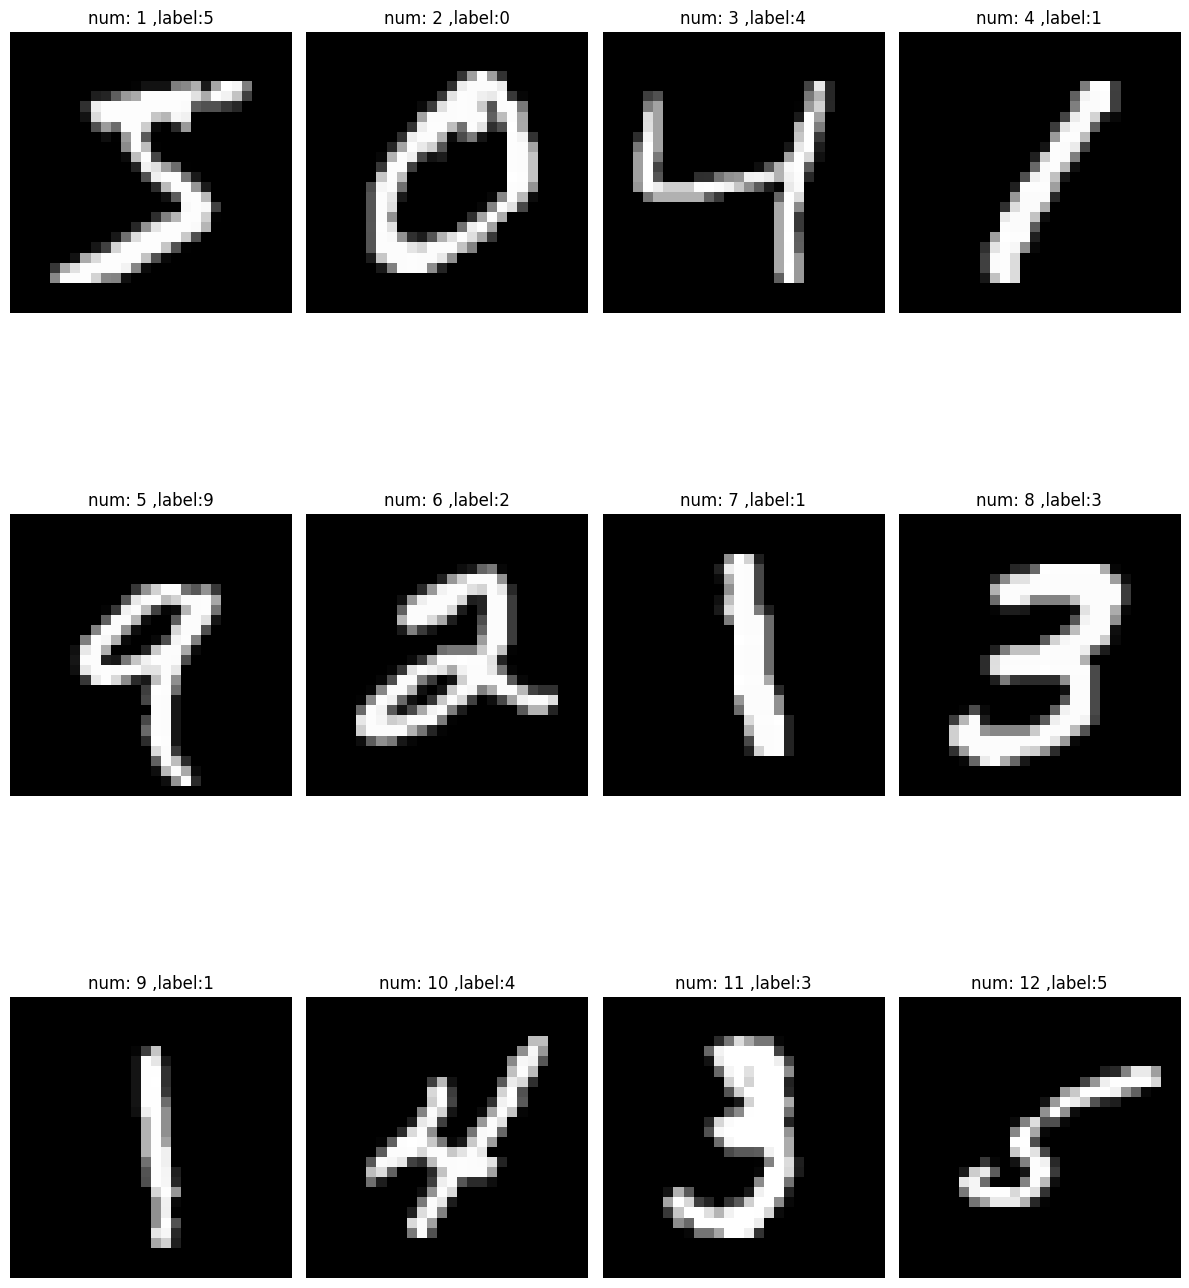

In [25]:
import matplotlib.pyplot as plt
from torchvision import datasets
import torchvision.transforms as transforms

# 不加 transform，让图像保持原始形状和像素（0~255）
trainset = datasets.MNIST(root='./data', train=True, download=False)

# 获取第 i 个样本



fig,ax =plt.subplots(3, 4, figsize=(12, 16)) 
ax = ax.flatten() #将ax展平为一维数组
for i in range(12):
    img, label = trainset[i]
    # 显示图像
    ax[i].imshow(img, cmap='gray',) #因为是255的数据，所以我们使用gray 
    ax[i].set_title(f"num: {i+1} ,label:{label}" )
    ax[i].axis('off')
plt.tight_layout() #自动调整子图参数，使之填充整个图像区域
plt.show()



In [ ]:
class Reshape:
    def __init__(self,shapesize):
        self.shapesize = shapesize
    def __call__(self,img): #像函数一样调用自己这个类，没有继承于nn.Module,所以用__call__函数 
        return torch.reshape(img,self.shapesize)
    

In [ ]:
total_transform = transforms.Compose([transforms.ToTensor(),transforms.ConvertImageDtype(torch.float32),Reshape((-1,))])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=False, transform=total_transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=False, transform=total_transform)


In [26]:
trainset.data.shape
testset.data.shape



torch.Size([10000, 28, 28])

In [34]:
for i in range(5):
    print(trainset[i][1])

i=0
testset[i][0].unique()
    

5
0
4
1
9


tensor([0.0000, 0.0039, 0.0118, 0.0196, 0.0353, 0.0549, 0.0667, 0.0706, 0.0745,
        0.0824, 0.0863, 0.1216, 0.1373, 0.1412, 0.1490, 0.1569, 0.1725, 0.2039,
        0.2235, 0.2275, 0.2314, 0.2353, 0.2392, 0.2431, 0.2588, 0.2627, 0.2824,
        0.2941, 0.3020, 0.3255, 0.3294, 0.4157, 0.4471, 0.4510, 0.4745, 0.4941,
        0.5059, 0.5216, 0.5490, 0.5922, 0.6235, 0.6392, 0.6510, 0.6667, 0.7137,
        0.7255, 0.7333, 0.7765, 0.7961, 0.8039, 0.8118, 0.8196, 0.8588, 0.8667,
        0.8706, 0.8784, 0.8824, 0.8902, 0.8980, 0.9137, 0.9255, 0.9333, 0.9412,
        0.9451, 0.9490, 0.9725, 0.9765, 0.9804, 0.9843, 0.9922, 0.9961, 1.0000])

In [8]:
batch_size = 64
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testsetloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)  

In [30]:
model = nn.Sequential(nn.Linear(784, 128), nn.ReLU(), nn.Linear(128, 64), nn.ReLU(), nn.Linear(64, 10))
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
trainer=torch.optim.RMSprop(model.parameters(), lr=0.01)
loss = nn.CrossEntropyLoss()


In [36]:
a=np.random.uniform(0,5,784)

In [38]:
def acc(output,y,batch_size):
    pred=torch.argmax(output,1)
    corrs=(pred==y).sum().item()
    acc=corrs/batch_size*100
    return acc


    
    

In [41]:
for iter in range(20):
    train_acc=0
    running_loss=0
    model.train() #进入训练模式
    for i,(x,y) in enumerate(trainloader):
        x=x.to(device)
        y=y.to(device)
        output=model(x)
        loss_value=loss(output,y)
        trainer.zero_grad()
        loss_value.backward()
        trainer.step()
        train_acc+=acc(output,y,batch_size)
        running_loss+=loss_value.item()
    
    print(f"iter:{iter+1}, train_loss:{running_loss/(i+1)}, train_acc:{train_acc/(i+1)}")

iter:1, train_loss:0.1065219155846114, train_acc:97.99440298507463
iter:2, train_loss:0.09961100064256988, train_acc:98.0643656716418
iter:3, train_loss:0.09140146983602934, train_acc:98.02771855010661
iter:4, train_loss:0.09988795248101955, train_acc:97.98274253731343
iter:5, train_loss:0.10006310069118697, train_acc:97.91944296375266
iter:6, train_loss:0.09395870022068975, train_acc:97.97274786780383
iter:7, train_loss:0.10004352132265677, train_acc:97.93443496801706
iter:8, train_loss:0.11289233063452478, train_acc:97.93276918976545
iter:9, train_loss:0.09581620692117335, train_acc:98.09601545842217
iter:10, train_loss:0.10759198774865657, train_acc:97.80950159914713
iter:11, train_loss:0.09043139884362457, train_acc:98.09268390191897
iter:12, train_loss:0.08829643892427154, train_acc:98.02105543710022
iter:13, train_loss:0.09953651384482162, train_acc:98.01605810234541
iter:14, train_loss:0.09290516103062714, train_acc:97.97441364605544
iter:15, train_loss:0.09866030304777672, trai

In [44]:
test_acc=0
allresults=[]
model.eval() 
with torch.no_grad():
    for i,(x,y) in enumerate(testsetloader):
        x=x.to(device)
        y=y.to(device)
        output=model(x)
        total_sample_acc=acc(output,y,batch_size)
        print(f"iter:{i},tatal sample accuracy is {total_sample_acc}")
        test_acc+=acc(output,y,batch_size)
print(f"test accuracy is {test_acc/(i+1)}")

iter:0,tatal sample accuracy is 98.4375
iter:1,tatal sample accuracy is 95.3125
iter:2,tatal sample accuracy is 98.4375
iter:3,tatal sample accuracy is 98.4375
iter:4,tatal sample accuracy is 96.875
iter:5,tatal sample accuracy is 95.3125
iter:6,tatal sample accuracy is 92.1875
iter:7,tatal sample accuracy is 95.3125
iter:8,tatal sample accuracy is 93.75
iter:9,tatal sample accuracy is 95.3125
iter:10,tatal sample accuracy is 95.3125
iter:11,tatal sample accuracy is 98.4375
iter:12,tatal sample accuracy is 93.75
iter:13,tatal sample accuracy is 93.75
iter:14,tatal sample accuracy is 92.1875
iter:15,tatal sample accuracy is 92.1875
iter:16,tatal sample accuracy is 96.875
iter:17,tatal sample accuracy is 95.3125
iter:18,tatal sample accuracy is 90.625
iter:19,tatal sample accuracy is 90.625
iter:20,tatal sample accuracy is 93.75
iter:21,tatal sample accuracy is 95.3125
iter:22,tatal sample accuracy is 95.3125
iter:23,tatal sample accuracy is 93.75
iter:24,tatal sample accuracy is 95.3125